# Initial figures

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm

from vmc.interface import *
from vmc import run_experiment, sample_local_energies, run_all

from IPython.core.pylabtools import figsize
from IPython.core.display import display

In [2]:
sns.set(color_codes=True, font_scale=2)
figsize(24, 18)

In [3]:
mass = 1.0
omega = 1.0

num_particles = [1, 10, 100]
num_dimensions = [1, 2, 3]

alpha_min = 0.3
alpha_max = 0.7
num_alphas = 11

bootstrap_samples = 0

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)
parameter_names = ["alpha"]

step_length = 0.5

num_samples = int(2**21)
num_thermalization_steps = int(0.1*num_samples)

kwargs = {
    "num_samples": num_samples, "step_length": step_length,
    "num_thermalization_steps": num_thermalization_steps}

  0%|          | 0/11 [00:00<?, ?it/s]

Num particles = 1	 Num dimensions = 1


  0%|          | 0/11 [00:00<?, ?it/s]

Analytic time = 4.083621025085449 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

Numeric time = 5.585057735443115 seconds
Num particles = 1	 Num dimensions = 2


  0%|          | 0/11 [00:00<?, ?it/s]

Analytic time = 4.190311908721924 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

Numeric time = 6.481403350830078 seconds
Num particles = 1	 Num dimensions = 3


  0%|          | 0/11 [00:00<?, ?it/s]

Analytic time = 4.503537654876709 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

Numeric time = 7.54228949546814 seconds
Num particles = 10	 Num dimensions = 1


  0%|          | 0/11 [00:00<?, ?it/s]

Analytic time = 4.8987555503845215 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

Numeric time = 19.460312843322754 seconds
Num particles = 10	 Num dimensions = 2


  0%|          | 0/11 [00:00<?, ?it/s]

Analytic time = 6.163262128829956 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

Numeric time = 39.604947328567505 seconds
Num particles = 10	 Num dimensions = 3


  0%|          | 0/11 [00:00<?, ?it/s]

Analytic time = 7.618396520614624 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

Numeric time = 68.14553165435791 seconds
Num particles = 100	 Num dimensions = 1


  0%|          | 0/11 [00:00<?, ?it/s]

Analytic time = 18.134907007217407 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

Numeric time = 627.1692078113556 seconds
Num particles = 100	 Num dimensions = 2


  0%|          | 0/11 [00:00<?, ?it/s]

Analytic time = 29.940513849258423 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

Numeric time = 2062.857762813568 seconds
Num particles = 100	 Num dimensions = 3


  0%|          | 0/11 [00:00<?, ?it/s]

Analytic time = 46.26110863685608 seconds


100%|██████████| 11/11 [1:13:51<00:00, 402.88s/it]


Numeric time = 4431.05509185791 seconds


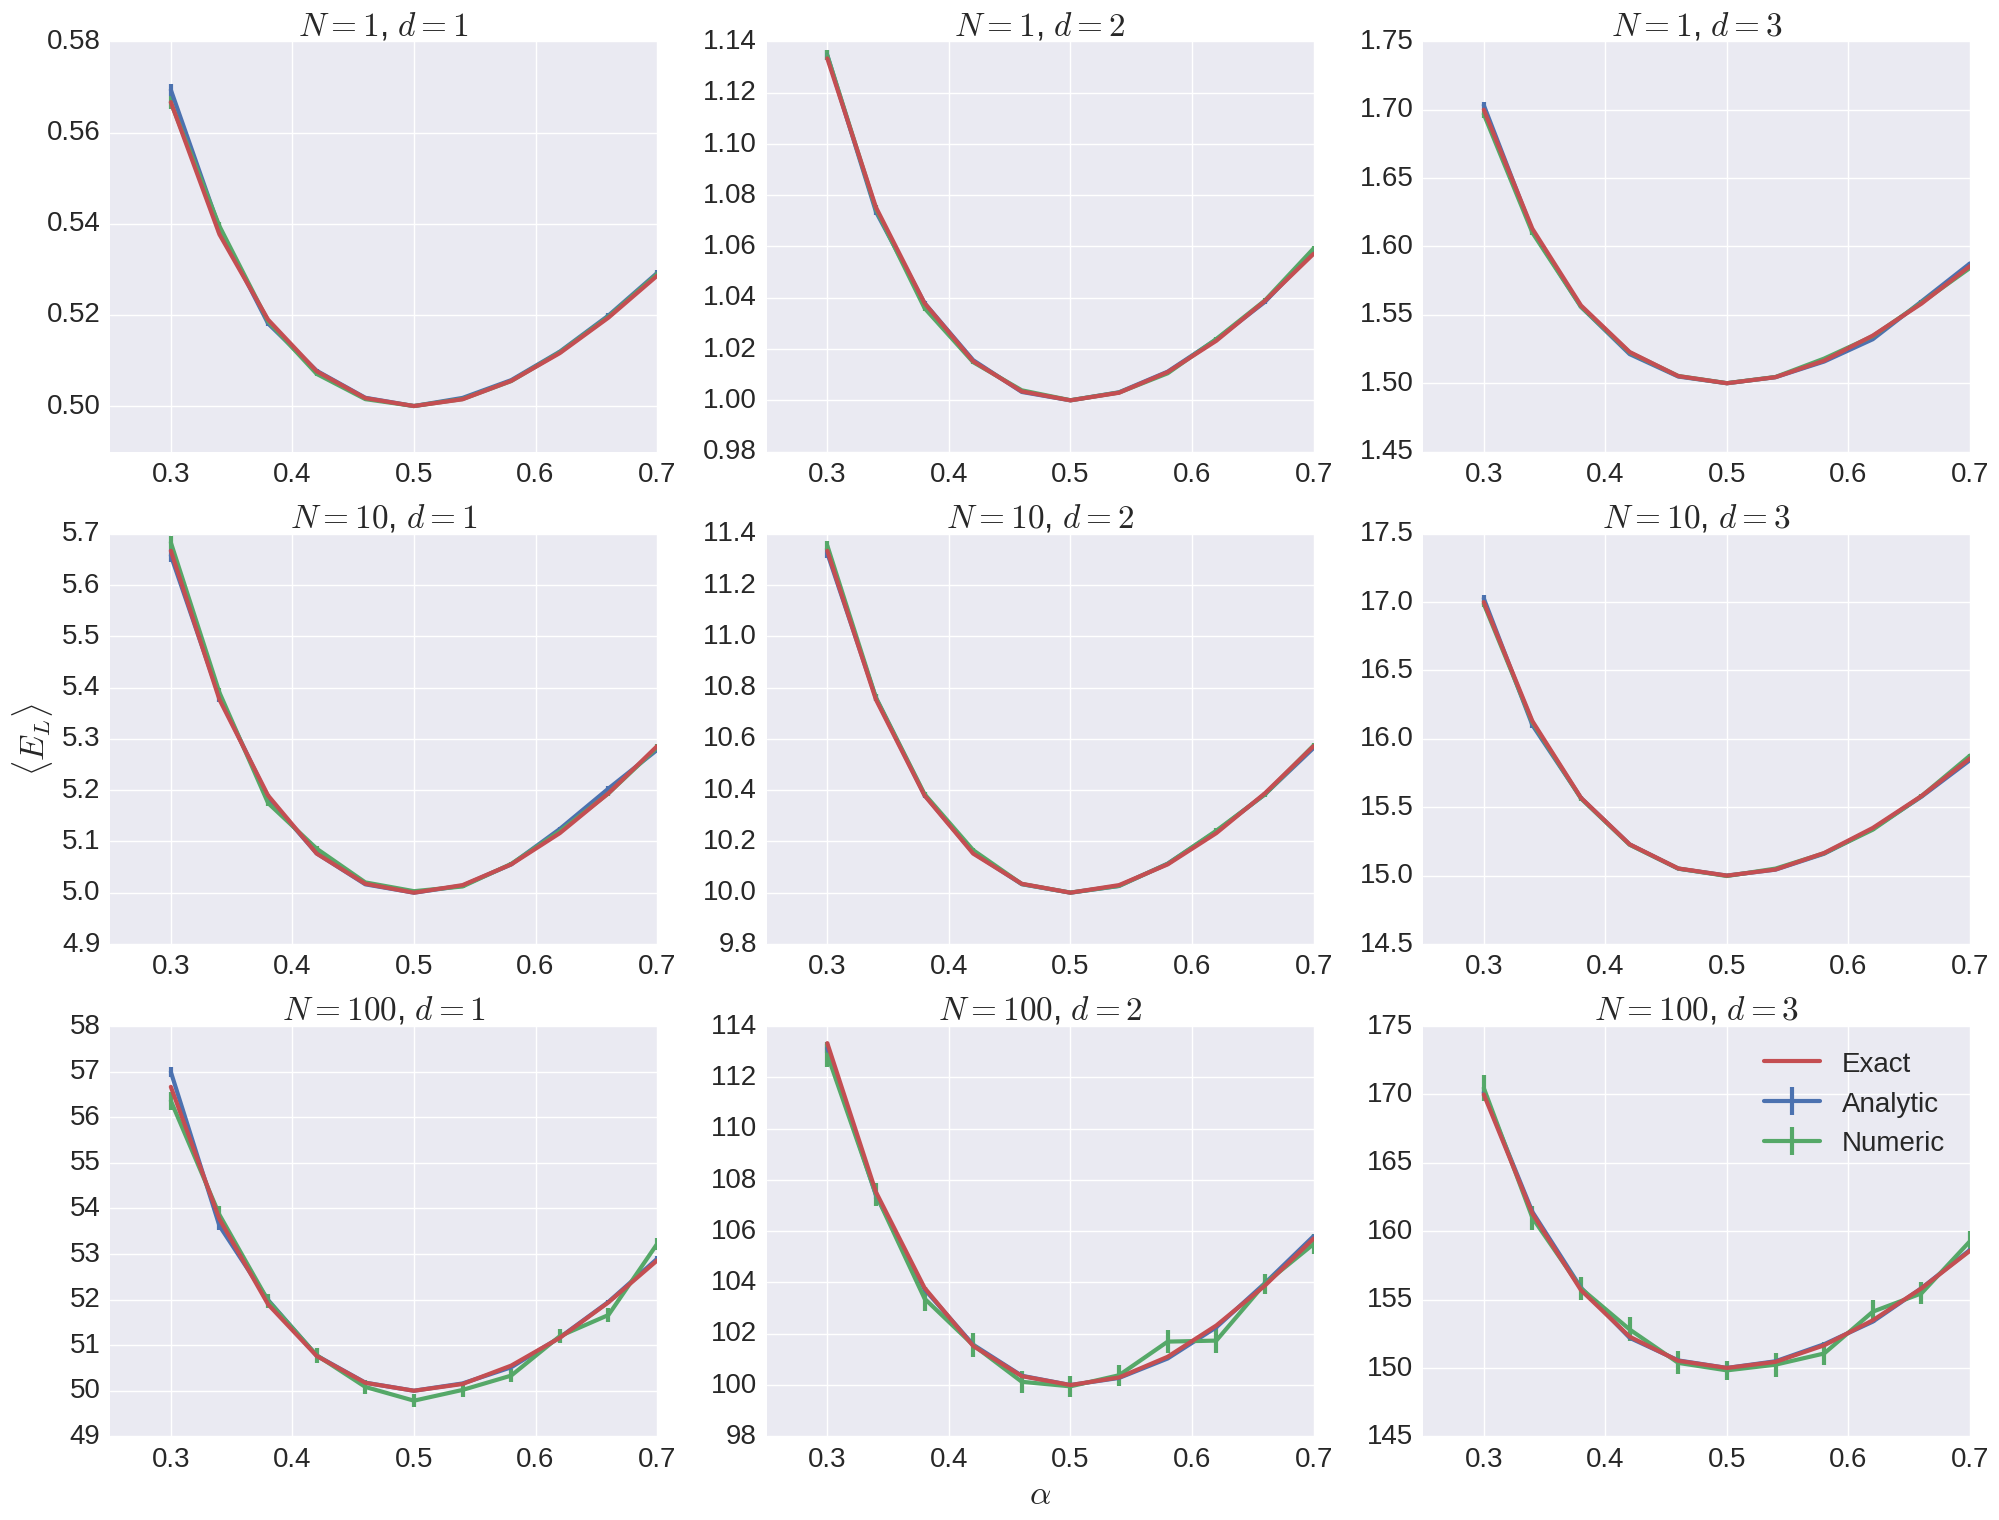

In [4]:
plot_no = 0
for i in num_particles:
    for j in num_dimensions:
        print ("Num particles = {0}\t Num dimensions = {1}".format(i, j))

        wavefunction_analytical = PySimpleGaussian(
            i, j, mass, omega, spread=step_length)
        wavefunction_approximate = PySimpleGaussianNumerical(
            i, j, mass, omega, spread=step_length)

        hamiltonian = PyHarmonicOscillator()

        sampler_analytical = PySampler(
            wavefunction_analytical, hamiltonian, PyMetropolisAlgorithm())
        sampler_approximate = PySampler(
            wavefunction_approximate, PyHarmonicOscillator(), PyMetropolisAlgorithm())

        df_analytical = run_all(
            sampler_analytical, alphas, parameter_names, bootstrap_samples, **kwargs)
        print ("Analytic time = {0} seconds".format(df_analytical["sampling_time"].sum()))

        df_approximate = run_all(
            sampler_approximate, alphas, parameter_names, bootstrap_samples, **kwargs)
        print ("Numeric time = {0} seconds".format(df_approximate["sampling_time"].sum()))
        
        plot_no += 1
        plt.subplot(len(num_particles), len(num_dimensions), plot_no)
        plt.title(r"$N = %d$, $d = %d$" % (i, j))

        plt.errorbar(
            df_analytical["alpha"], df_analytical["energy"],
            yerr=df_analytical["block_std"], label="Analytic", linewidth=3)
        plt.errorbar(
            df_approximate["alpha"], df_approximate["energy"],
            yerr=df_approximate["block_std"], label="Numeric", linewidth=3)
        plt.plot(
            alphas.ravel(), hamiltonian.compute_exact_energy(wavefunction_analytical, alphas.ravel()),
            label="Exact", linewidth=3)

        if plot_no == 4:
            plt.ylabel(r"$\langle E_L \rangle$", fontsize=24)

        if plot_no == 8: 
            plt.xlabel(r"$\alpha$", fontsize=24)

plt.legend(loc="best")
plt.savefig("../data/figures/problem_b.pdf")
plt.show()